In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df_train = pd.read_csv('data/tmp/df_grouped.csv')
df_test = pd.read_csv('data/tmp/df_grouped_test.csv')

In [25]:
df_test

,minute,count,minute.1
0,2023-09-01 00:00:00,23,2023-09-01 00:00:00
1,2023-09-01 00:01:00,26,2023-09-01 00:01:00
2,2023-09-01 00:02:00,22,2023-09-01 00:02:00
3,2023-09-01 00:03:00,26,2023-09-01 00:03:00
4,2023-09-01 00:04:00,25,2023-09-01 00:04:00
...,...,...,...
14395,2023-09-10 23:55:00,25,2023-09-10 23:55:00
14396,2023-09-10 23:56:00,23,2023-09-10 23:56:00
14397,2023-09-10 23:57:00,17,2023-09-10 23:57:00
14398,2023-09-10 23:58:00,23,2023-09-10 23:58:00


In [32]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.001, random_state=42)
isolation_forest.fit(df_train[['count']])


df_train['anomaly_score'] = isolation_forest.decision_function(df_train[['count']])
outliers = isolation_forest.predict(df_train[['count']]) #df_train['anomaly']
df_train.head()


,minute,count,minute.1,anomaly_score
0,2023-07-01 00:00:00,16,2023-07-01 00:00:00,0.267975
1,2023-07-01 00:01:00,29,2023-07-01 00:01:00,0.280814
2,2023-07-01 00:02:00,16,2023-07-01 00:02:00,0.267975
3,2023-07-01 00:03:00,21,2023-07-01 00:03:00,0.288611
4,2023-07-01 00:04:00,18,2023-07-01 00:04:00,0.285901


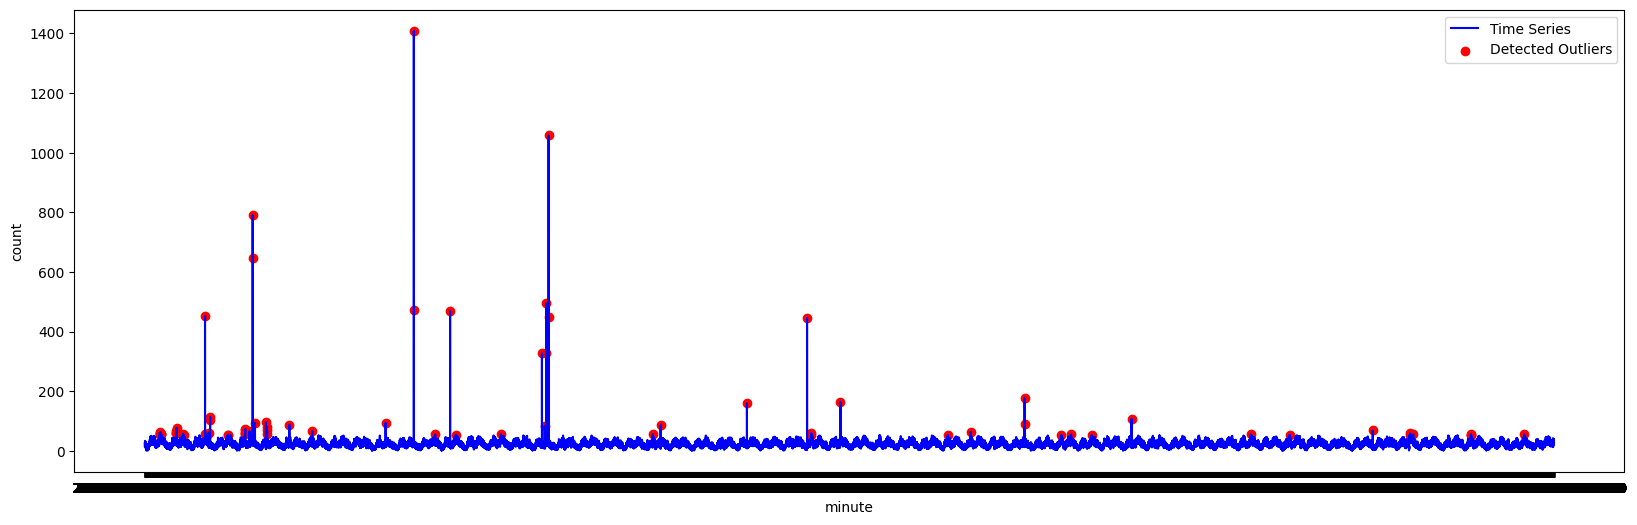

In [34]:
# Visualization of the time series with detected outliers
plt.figure(figsize=(20, 6))
plt.plot(df_train['minute'], df_train['count'], color='blue', label='Time Series')
plt.scatter(df_train['minute'][outliers == -1], 
    df_train['count'][outliers == -1], color='red', label='Detected Outliers')
plt.xlabel('minute')
plt.ylabel('count')
plt.legend()
plt.show()